<a href="https://colab.research.google.com/github/ChapeuG/Bootcamp-Data-Science-Aplicada-2020/blob/main/M%C3%B3dulo_02_Bootcamp_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados do Datasus (a partir de 2008)

## Bibliotecas importadas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

pd.options.display.float_format = "{:.2f}".format

In [ ]:
pip install plotly==4.12.0

In [ ]:
# Importando Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Módulo 01 - Analisando dados da saúde com Python e Pandas

## Parte 01 - Aquisição e leitura de dados reais



>Atrelamos nosso arquivo **CSV** a variável dados. Para isso utilizaremos o *pd.read_csv* para realizar a leitura. Temos então:


*   Caminho onde está o arquivo

*   **enconding = 'ISO-8859-1'** (Padrão que utilizaremos para ler arquivos como caracteres latinos e de compatibilidade com o **UTF-8**

*   **skiprows** (ignora as  ***x*** primeiras linhas do arquivo)
*   **skipfooter** (Ignora as ***y*** últimas linhas do arquivo)


*   **sep** (separador de linhas e colunas do nosso arquivo. em **csv** geralmente é a *vírgula* ou *ponto-virgula*
*   Item da lista


*   **thousands = ' . '** (habilitará a transformação dos valores para o formato americano, já que o brasileiro é diferente, o que evita erros futuros)
*   **decimal = ' , ' ** (habilita que os decimais serão separados por vírgulas)



*   **na_values** é de suma importância pois pega valores vazios e transforma para **NaN**

In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv',
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    engine='python', thousands='.', decimal=',', na_values='-')



> .head mostra as 5 primeiras linhas



In [ ]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,30207

In [ ]:
dados['2008/Ago'].mean()

27800320.306666665

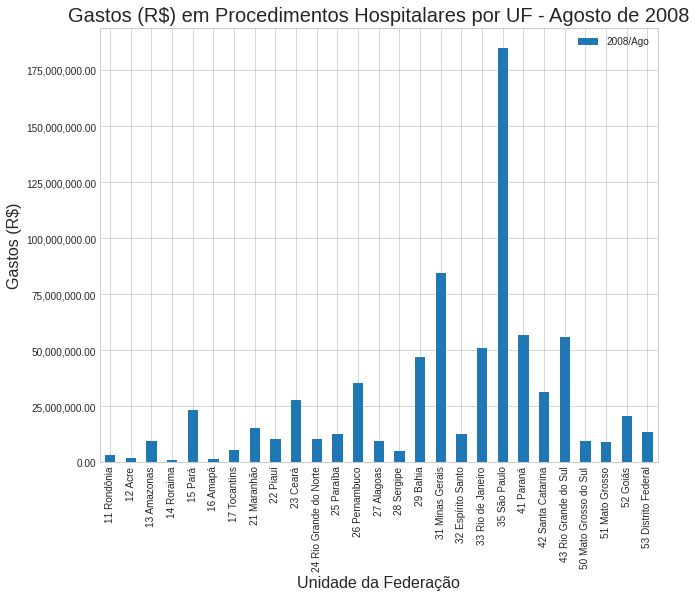

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind='bar',
           figsize=(10,8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Unidade da Federação', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares por UF - Agosto de 2008', fontdict = {'fontsize' : 20})

plt.show()

### Desafios 1 e 2


*   Desafio 1 -> Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras 
*   Desafio 2 -> Faça a mesma análise realizada em aula, porém para o mês mais recente, no caso Agosto/2020.



Como a coluna do mês de Agosto de 2020 possui alguns valores nulos, vamos dropá-los antes de plotar nosso gráfico, mas vamos mantê-los no nosso dataset.

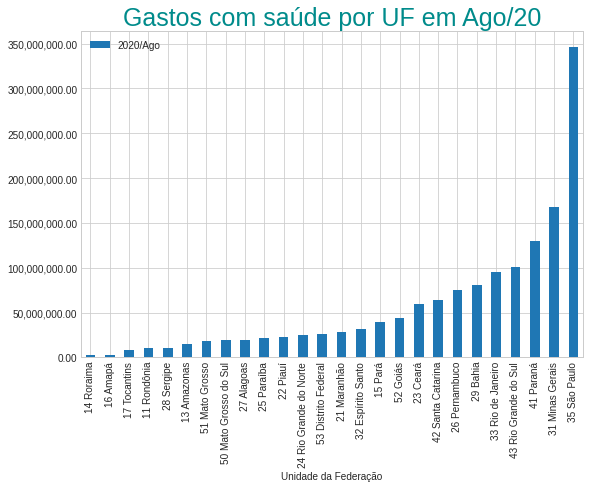

In [ ]:
#Classificando do menor para o maior em Ago/20, e tirando Nas
dados_sorted = dados.sort_values(by = ['2020/Ago']).dropna()

#Visualizando para Ago/20
ax = dados_sorted.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Gastos com saúde por UF em Ago/20", color ="#008B8B",size = 25)
plt.show()

In [ ]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,30207

### Desafios 1 e 2 usando o Plotly

In [ ]:
# usando Plotly
fig = go.Figure()

fig.add_trace(go.Bar(x = dados['Unidade da Federação'],
                     y = dados['2008/Ago'],
                     name = 'Agosto/2008'))

fig.add_trace(go.Bar(x = dados['Unidade da Federação'],
                     y = dados['2020/Ago'],
                     name = 'Agosto/2020'))

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF - Agosto de 2020',
    xaxis_title_text = 'Unidades da Federação',
    xaxis={'categoryorder':'category ascending'},
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)

fig.show()

## Parte 02 - Primeiras visualizações de dados

A partir de agora iremos utilizar os dados de acordo com o **mês do atendimento** e não do faturamento, que havíamos feito antes.

In [ ]:
dados2 = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv',
                    encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=12,
                    engine='python', thousands='.', decimal=',', na_values = '-')

dados2.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


Vamos tratar o nome das nossas colunas, transformando a abreviação dos meses em números.

In [ ]:
import re

rename_dict = {
    'Jan':'01',
    'Fev':'02',
    'Mar':'03',
    'Abr':'04',
    'Mai':'05',
    'Jun':'06',
    'Jul':'07',
    'Ago':'08',
    'Set':'09',
    'Out':'10',
    'Nov':'11',
    'Dez':'12',
}

def rename_month(month):
    pattern = re.compile(r'\b(' + '|'.join(rename_dict.keys()) + r')\b')
    return pattern.sub(lambda x: rename_dict[x.group()], month)


dados2.columns = list(map(rename_month, dados2.columns))

In [ ]:
dados2.columns

Index(['Unidade da Federação', '1992/03', '1992/04', '1993/05', '1993/12',
       '1994/01', '1994/02', '1994/05', '1994/08', '1994/11',
       ...
       '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05',
       '2020/06', '2020/07', '2020/08', 'Total'],
      dtype='object', length=280)

In [ ]:
dados2.tail()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
22,43 Rio Grande do Sul,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


In [ ]:
dados2.mean()

1992/03        40243.16
1992/04        11449.99
1993/05        34583.77
1993/12        68556.52
1994/01        39809.34
               ...     
2020/05     46769027.82
2020/06     45367349.74
2020/07     40717083.95
2020/08     19880851.12
Total     5993724452.01
Length: 279, dtype: float64

In [ ]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(279), object(1)
memory usage: 59.2+ KB


In [ ]:
dados2.describe()

,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,2000/04,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,5.00,5.00,3.00,3.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,26.00,27.00
mean,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,15220.67,80286.48,20502.61,167831.88,93218.69,8676.09,5776.25,2256.54,6768.10,...,44982552.14,46225259.58,48124741.88,44016901.84,46408157.62,43927647.26,42373621.49,45739245.03,41032262.53,46827789.99,47239172.40,48417052.85,46395470.88,48086014.64,49345477.29,45758563.30,49566746.37,46123498.40,43886096.76,47687458.50,44611528.07,47288709.35,48423567.04,51139897.77,47411368.59,51552077.60,50394646.23,49325792.18,51035126.81,47560486.81,45776962.72,49365504.99,45084524.48,45236027.39,40005678.92,46769027.82,45367349.74,40717083.95,19880851.12,5993724452.01
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6624.18,nan,nan,nan,nan,10411.74,7338.65,922.50,10744.26,...,58175274.05,60208008.37,63497043.49,56710314.78,60690288.24,56839876.94,55014426.00,59269217.98,53547379.58,60615321.14,60947262.29,62003517.93,59746338.72,61581707.51,63422341.58,58980269.22,64040556.09,59464319.37,56760458.05,61842215.77,57091413.99,60729021.43,62405602.25,65749545.42,60552099.50,65999947.68,64357372.21,62634426.60,65054555.98,60419931.36,58350827.23,63825806.17,57378788.07,58487564.07,52470681.18,61740606.78,60665540.70,56808984.40,28398050.32,8057775772.23
min,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,10536.67,80286.48,20502.61,167831.88,93218.69,1237.07,1283.84,1267.55,261.08,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2277493.49,2441325.03,2234388.36,2473008.49,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2383895.48,2199920.70,1163813.08,834187.31,291637984.75
25%,40243.16,11449.99,34583.77,68556.52,39809.34,19904.67,19904.67,34532.40,23374.12,19904.67,24509.71,19442.14,10536.67,34523.06,14672.77,34569.76,37331.15,19904.67,38882.55,75358.43,16133.26,2750.47,859884.95,1675816.64,1398817.11,18977.88,26050.45,167713.68,149751.54,54437.07,54469.76,12878.67,80286.48,20502.61,167831.88,93218.69,2361.04,1309.80,1837.95,567.42,...,14613499.21,14899615.56,14732951.76,14643590.43,14775931.00,14089005.89,14054437.16,15064173.61,13194424.46,15456829.37,15249865.98,16056667.07,15364362.24,15880640.64,16193074.55,15350307.45,16517604.

In [ ]:
dados2[['Unidade da Federação', '2008/08', '2008/09']].head()

,Unidade da Federação,2008/08,2008/09
0,11 Rondônia,2938286.29,2843930.91
1,12 Acre,1886871.84,2084884.80
2,13 Amazonas,8331763.97,8148089.92
3,14 Roraima,1045291.11,1003740.89
4,15 Pará,23259148.28,23667690.01


In [ ]:
colunas_usaveis = dados2.dropna(axis=1).mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/08',
 '2007/09',
 '2007/10',
 '2007/11',
 '2007/12',
 '2008/01',
 '2008/02',
 '2008/03',
 '2008/04',
 '2008/05',
 '2008/06',
 '2008/07',
 '2008/08',
 '2008/09',
 '2008/10',
 '2008/11',
 '2008/12',
 '2009/01',
 '2009/02',
 '2009/03',
 '2009/04',
 '2009/05',
 '2009/06',
 '2009/07',
 '2009/08',
 '2009/09',
 '2009/10',
 '2009/11',
 '2009/12',
 '2010/01',
 '2010/02',
 '2010/03',
 '2010/04',
 '2010/05',
 '2010/06',
 '2010/07',
 '2010/08',
 '2010/09',
 '2010/10',
 '2010/11',
 '2010/12',
 '2011/01',
 '2011/02',
 '2011/03',
 '2011/04',
 '2011/05',
 '2011/06',
 '2011/07',
 '2011/08',
 '2011/09',
 '2011/10',
 '2011/11',
 '2011/12',
 '2012/01',
 '2012/02',
 '2012/03',
 '2012/04',
 '2012/05',
 '2012/06',
 '2012/07',
 '2012/08',
 '2012/09',
 '2012/10',
 '2012/11',
 '2012/12',
 '2013/01',
 '2013/02',
 '2013/03',
 '2013/04',
 '2013/05',
 '2013/06',
 '2013/07',
 '2013/08',
 '2013/09',
 '2013/10',
 '2013/11',
 '2013/12',
 '2014/01',
 '2014/02',
 '2014/03',
 '2014/04',
 '2

In [ ]:
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478

In [ ]:
usaveis['2019/08'].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/08, dtype: float64

In [ ]:
usaveis.loc['12 Acre']

2007/08       10470.07
2007/09       14001.71
2007/10       86200.85
2007/11      301323.68
2007/12      769612.36
              ...     
2020/04     2472063.08
2020/05     2383895.48
2020/06     2199920.70
2020/07     1163813.08
Total     420668039.63
Name: 12 Acre, Length: 157, dtype: float64

In [ ]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/08,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/09,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/10,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/11,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/12,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


In [ ]:
usaveis = usaveis.drop('Total', axis=1)
usaveis.tail()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.31,69933577.14,66486835.62,69108367.47,67570770.09,70074754.73,70884009.17,65079794.92,66556015.62,66097030.85,...,83188379.66,95149948.63,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,10257782.00,10167827.24,9602843.49,10272466.74,10814111.53,10371654.90,9140959.80,9771575.46,9648706.17,11784290.10,11240770.37,11155445.90,11796784.62,11956687.54,12420336.71,11489768.73,11698487.88,11286787.17,10814729.24,11570718.38,10920760.16,13204085.81,11711475.20,12671896.78,12584046.80,11808910.05,12917152.45,12429678.06,12526681.04,12305360.94,...,15646601.91,18212081.17,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,15835149.88,16543674.21,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70
52 Goiás,179395.82,418053.58,1198730.25,2712117.54,9293914.78,74063828.22,18149374.27,20992213.03,21049477.30,19162546.79,20332533.92,20008563.15,21041071.33,21396098.51,20610541.50,19912347.49,19343787.54,20817880.66,20201261.16,24174119.21,22943952.73,23781906.69,23668981.57,23293723.39,25835544.14,25151192.72,24729933.86,24090130.18,23172

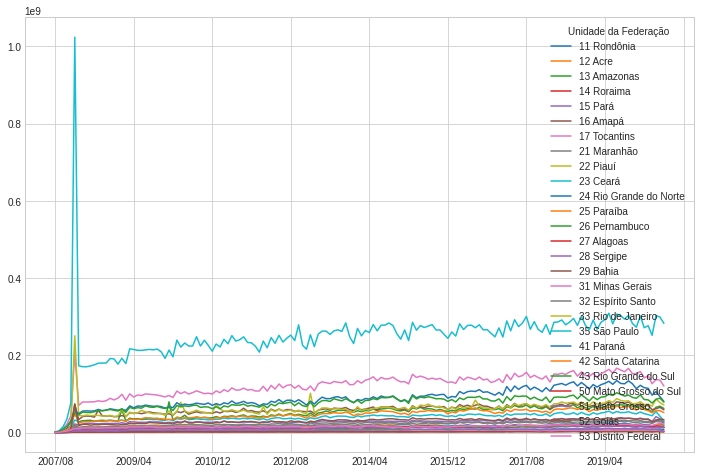

In [ ]:
usaveis.T.plot(
    figsize=(12,8))

### Desafios

* Desafio 01 -> Reposicionar a legenda do gráfico em uma posição mais adequada
* Desafio 02 -> Plotar o gráfico de linha com apenas 5 estados de sua preferência

#### Desafio 1

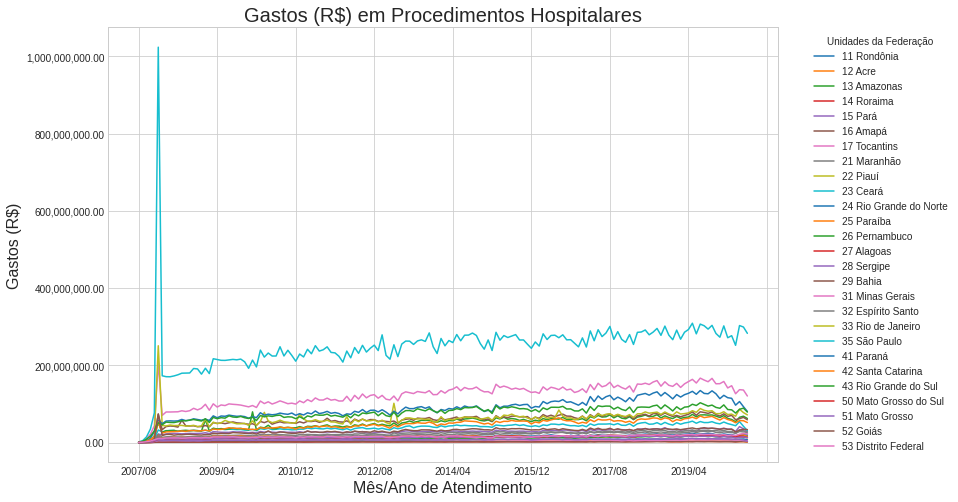

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares', fontdict = {'fontsize' : 20})

plt.show()

In [ ]:
ufs_maiores = usaveis.T.sum().sort_values(ascending=False)[:5].index
ufs_maiores

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro'],
      dtype='object', name='Unidade da Federação')

#### Desafio 2

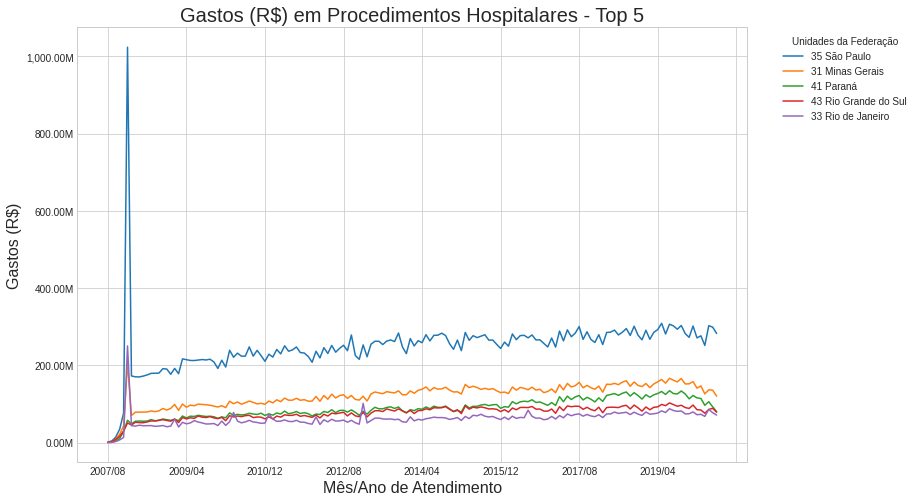

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.loc[ufs_maiores].T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x/1000000) + 'M'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares - Top 5', fontdict = {'fontsize' : 20})

plt.show()

### Desafios usando Plotly

In [ ]:
aux = usaveis.reset_index()
top_5 = aux[aux['Unidade da Federação'].isin(ufs_maiores)]
top_5

,Unidade da Federação,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,678499

#### Plotly

In [ ]:
# usando Plotly
fig = go.Figure()

for uf in top_5['Unidade da Federação'].values:
    line =  top_5[top_5['Unidade da Federação'] == uf]
    gastos = line.iloc[:,1:].values[0]

    fig.add_trace(go.Scatter(x = top_5.columns[1:].values,
                        y = gastos,
                        name = uf))

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='UFs Top 5',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

#### Pandas integrado ao Plotly

In [ ]:
fig = usaveis.loc[ufs_maiores].T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

## Parte 03 - Manipulação de dados

In [ ]:
def get_usaveis(dados):
    colunas_usaveis = dados.dropna(axis = 1).mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")

    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    
    return usaveis

In [ ]:
def get_ordenados(dados):
    ordenado_por_total = dados.sort_values(by='Total', ascending=False)
    ordenado_por_total = ordenado_por_total.drop('Total', axis=1)

    return ordenado_por_total.iloc[:,7:]

In [ ]:
usaveis = get_usaveis(dados2)
usaveis = usaveis.drop('Total', axis=1)

In [ ]:
usaveis[:7]

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.

In [ ]:
usaveis[:7].T.plot(backend="plotly")

In [ ]:
np.random.seed(687942)
usaveis.sample(7)

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18225302.41,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6022437.54,5984209.71,6640964.62,6461045.18,6622397.84,6302602.71,6330494.80,66

In [ ]:
usaveis.sample(7).T.plot(backend="plotly")

In [ ]:
usaveis['Total'] = usaveis.sum(axis=1)
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478

In [ ]:
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total.head()

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380

In [ ]:
ordenado_por_total.head().T.plot(backend="plotly")

### Desafios

* Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.
* Desafio 02: Adicionar uma coluna mostrando a região de cada estado.
* Desafio 03: Deixar o gráfico mais bonito. A mensagem mais clara.
* Desafio 04: Adicione o seu estado aos 5 estados existentes e plote.
* Desafio 05: Plotar só para os estados do sudeste e ver se os picos são semelhantes em todos os estados
* Desafio 06: Adicione o seu estado e deixe o gráfico bonito.

#### Desafio 1


In [ ]:
usaveis = usaveis.drop('Total', axis = 1)

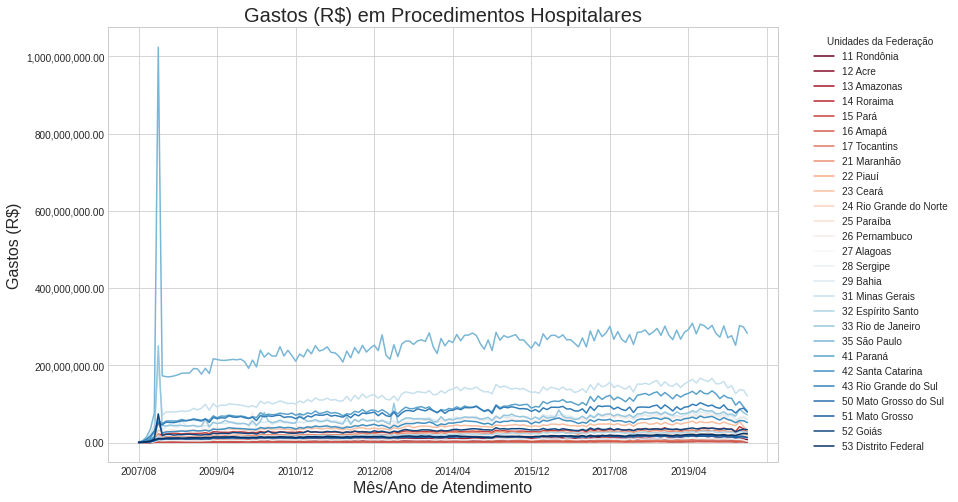

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = usaveis.T.plot(figsize=(12,8), colormap = cm.get_cmap('RdBu', len(usaveis.index)))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))

plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title='Unidades da Federação')
plt.ylabel('Gastos (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Mês/Ano de Atendimento', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares', fontdict = {'fontsize' : 20})

plt.show()

#### Desafio 2

Adicionando a região de cada estado

In [ ]:
dados2.head()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [ ]:
def get_usaveis(dados):
    colunas_usaveis = dados.dropna(axis = 1).mean().index.tolist()
    colunas_usaveis.insert(0, "Unidade da Federação")
    colunas_usaveis.insert(len(colunas_usaveis), "Região")

    usaveis = dados[colunas_usaveis]
    usaveis = usaveis.set_index("Unidade da Federação")
    
    return usaveis

In [ ]:
regioes = {
    '1': 'Norte',
    '2': 'Nordeste',
    '3': 'Sudeste',
    '4': 'Sul',
    '5': 'Centro-Oeste'
}
def get_regiao(row):
    return regioes.get(row['Unidade da Federação'][0])

dados2['Região'] = dados2.apply(get_regiao, axis=1)
dados2.head()

,Unidade da Federação,1992/03,1992/04,1993/05,1993/12,1994/01,1994/02,1994/05,1994/08,1994/11,1995/01,1995/03,1995/06,1995/08,1995/12,1996/02,1996/03,1996/08,1996/12,1997/02,1997/11,1998/02,1998/03,1998/07,1998/08,1998/09,1998/10,1998/12,1999/02,1999/03,1999/05,1999/07,1999/08,1999/09,1999/10,1999/11,1999/12,2000/01,2000/02,2000/03,...,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,2020/08,Total,Região
0,11 Rondônia,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,Norte
1,12 Acre,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,nan,420668039.63,Norte
2,13 Amazonas,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,Norte
3,14 Roraima,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18,Norte
4,15 Pará,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71,Norte


#### Desafio 3

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)

In [ ]:
fig = ordenado_por_total.head().T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

#### Desafio 4

In [ ]:
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19

In [ ]:
df = pd.DataFrame(usaveis.drop('Total', axis=1).loc['53 Distrito Federal'])
df = df.T.iloc[:,7:]
df

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
53 Distrito Federal,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,12474757.39,14611655.44,13510243.87,15156900.72,14830081.29,15039803.35,14533593.49,...,15531998.60,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,Centro-Oeste


In [ ]:
top_5 = ordenado_por_total.head()
top_5

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,6511

In [ ]:
new = pd.concat([top_5, df], axis = 0)
new

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.3

In [ ]:
fig = new.T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='UFs Top 5 e DF',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

#### Desafios 5 e 6

estados do sudeste + df

In [ ]:
usaveis.head()

,2007/08,2007/09,2007/10,2007/11,2007/12,2008/01,2008/02,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19

In [ ]:
sudeste = usaveis[usaveis['Região'] == 'Sudeste'].drop('Total', axis=1)
sudeste = sudeste.iloc[:,7:]
sudeste

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
32 Espírito Santo,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,17618976.32,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
33 Rio de Janeiro,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,55205971.21,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,2160565

In [ ]:
new = pd.concat([sudeste, df], axis = 0)
new

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
32 Espírito Santo,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,16030031.21,15811419.60,17702137.74,16397384.20,17707422.11,17618976.32,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,Sudeste
33 Rio de Janeiro,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,55205971.21,...,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,Sudeste
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,22393

In [ ]:
fig = new.T.plot(backend="plotly")

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Ano/Mês do Atendimento',
    yaxis_title_text = 'Gastos (R$)',
    legend_title_text='Estados do Sudeste e DF',
    template = 'plotly_white',
    autosize = False,
    width = 1000,
    height = 500
)
fig.update_xaxes(nticks=20)

fig.show()

## Parte 04 - Análise de gráficos e criação de hipóteses

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total.head()

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,236807488.84,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste
31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,110062460.88,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste
41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,74994292.81,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul
43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,6511

In [ ]:
usaveis = get_usaveis(dados2)
ordenado_por_total = get_ordenados(usaveis)
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total = ordenado_por_total.drop('Região', axis = 1) / 1000000

meses_filtrados = ordenado_por_total.columns[47:150]
ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")

In [ ]:
fig = ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")
fig.update_yaxes(range=[0, 350])

In [ ]:
fig = ordenado_por_total[meses_filtrados].head(3).T.plot(backend="plotly")
fig.update_yaxes(range=[100, 350])

## Parte 05 - Manipulação e interpretação de gráficos

In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/07'

In [ ]:
gastos_mes_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente.plot(backend="plotly")

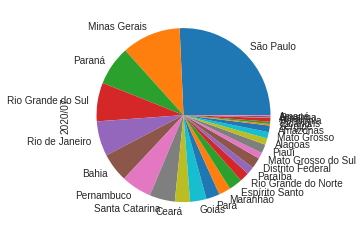

In [ ]:
gastos_mes_mais_recente.plot(kind='pie')

Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico já veio ordenado

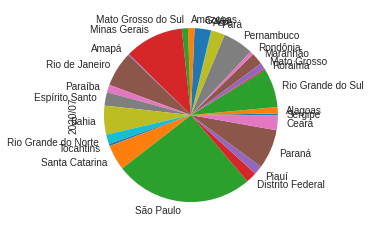

In [ ]:
gastos_mes_mais_recente.sample(frac=1).plot(kind='pie')

Horrores da pizza atual:

- legenda está horrível
- número de fatias inacreditável
- não dá para saber a ordem
- cores repetidas
- muito ruim para definir ordem
- péssimo para COMPARAR

In [ ]:
# visualização simples para valor absoluto
gastos_mes_mais_recente

Unidade da Federação
São Paulo             282.71
Minas Gerais          120.47
Paraná                 80.32
Rio Grande do Sul      78.93
Rio de Janeiro         71.54
Bahia                  58.90
Pernambuco             62.33
Santa Catarina         51.76
Ceará                  30.81
Goiás                  33.50
Pará                   27.62
Maranhão               24.37
Espírito Santo         27.46
Rio Grande do Norte    19.59
Paraíba                15.49
Distrito Federal       22.23
Mato Grosso do Sul     12.51
Piauí                  18.02
Alagoas                13.09
Mato Grosso            13.08
Amazonas               13.36
Sergipe                 3.31
Tocantins               4.49
Rondônia                7.41
Acre                    1.16
Roraima                 2.74
Amapá                   2.16
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente / gastos_mes_mais_recente.loc['Rio de Janeiro']

Unidade da Federação
São Paulo             3.95
Minas Gerais          1.68
Paraná                1.12
Rio Grande do Sul     1.10
Rio de Janeiro        1.00
Bahia                 0.82
Pernambuco            0.87
Santa Catarina        0.72
Ceará                 0.43
Goiás                 0.47
Pará                  0.39
Maranhão              0.34
Espírito Santo        0.38
Rio Grande do Norte   0.27
Paraíba               0.22
Distrito Federal      0.31
Mato Grosso do Sul    0.17
Piauí                 0.25
Alagoas               0.18
Mato Grosso           0.18
Amazonas              0.19
Sergipe               0.05
Tocantins             0.06
Rondônia              0.10
Acre                  0.02
Roraima               0.04
Amapá                 0.03
Name: 2020/07, dtype: float64

In [ ]:
(gastos_mes_mais_recente / gastos_mes_mais_recente.loc['Rio de Janeiro']).head()

Unidade da Federação
São Paulo           3.95
Minas Gerais        1.68
Paraná              1.12
Rio Grande do Sul   1.10
Rio de Janeiro      1.00
Name: 2020/07, dtype: float64

In [ ]:
gastos_mes_mais_recente.plot(kind='bar', backend='plotly')

In [ ]:
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind='bar', backend='plotly')

### Desafios

* Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

* Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

* Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

#### Desafio 1

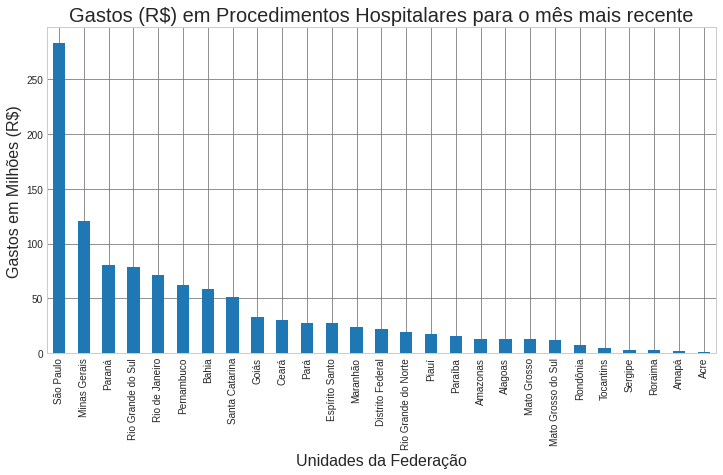

In [ ]:
plt.style.use('seaborn-whitegrid')

ax = gastos_mes_mais_recente.plot(kind='bar', figsize = (12,6))

plt.ylabel('Gastos em Milhões (R$)', fontdict = {'fontsize' : 16})
plt.xlabel('Unidades da Federação', fontdict = {'fontsize' : 16})
plt.title('Gastos (R$) em Procedimentos Hospitalares para o mês mais recente', fontdict = {'fontsize' : 20})
plt.grid(b=True, which='major', color='#777777', linestyle='-')

plt.show()

#### Desafio 2

In [ ]:
print('Gastos por Estado comparando com o DF')
comparativo = (gastos_mes_mais_recente / gastos_mes_mais_recente.loc['Distrito Federal'])
comparativo

Gastos por Estado comparando com o DF


Unidade da Federação
São Paulo             12.72
Minas Gerais           5.42
Paraná                 3.61
Rio Grande do Sul      3.55
Rio de Janeiro         3.22
Pernambuco             2.80
Bahia                  2.65
Santa Catarina         2.33
Goiás                  1.51
Ceará                  1.39
Pará                   1.24
Espírito Santo         1.24
Maranhão               1.10
Distrito Federal       1.00
Rio Grande do Norte    0.88
Piauí                  0.81
Paraíba                0.70
Amazonas               0.60
Alagoas                0.59
Mato Grosso            0.59
Mato Grosso do Sul     0.56
Rondônia               0.33
Tocantins              0.20
Sergipe                0.15
Roraima                0.12
Amapá                  0.10
Acre                   0.05
Name: 2020/07, dtype: float64

In [ ]:
comparativo.index.name

'Unidade da Federação'

In [ ]:
to_chart = pd.DataFrame(comparativo.sort_values(ascending=False))

def get_color(dados):
    colors = []
    if dados.index.name == 'Unidade da Federação':
        dados = dados.reset_index()
    for uf in dados['Unidade da Federação']:
        if uf == '53 Distrito Federal':
            colors.append('r')
        else:
            colors.append('b')
    return colors

to_chart['Cor'] = get_color(to_chart)

In [ ]:
fig = to_chart.plot(kind='bar', backend='plotly', orientation='h', color='Cor')

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por UF de acordo com a Data de Atendimento',
    xaxis_title_text = 'Gastos comparados com o DF (%)',
    yaxis_title_text = 'Unidades da Federação',
    template = 'plotly_white',
    yaxis = {
        'categoryorder': 'total ascending'
    },
    showlegend=False,
    autosize = False,
    width = 800,
    height = 700
)

#### Desafio 3

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao_por_uf = pd.read_html(url)[0].iloc[:,1:3]
populacao_por_uf.set_index('Unidade federativa', inplace=True)

populacao_por_uf = populacao_por_uf.to_dict()['População']
populacao_por_uf

{'Acre': '894 470',
 'Alagoas': '3 351 543',
 'Amapá': '861 773',
 'Amazonas': '4 228 381',
 'Bahia': '14 930 634',
 'Ceará': '9 187 103',
 'Distrito Federal': '3 055 149',
 'Espírito Santo': '4 064 052',
 'Goiás': '7 142 070',
 'Maranhão': '7 127 460',
 'Mato Grosso': '3 526 220',
 'Mato Grosso do Sul': '2 809 394',
 'Minas Gerais': '21 331 292',
 'Paraná': '11 516 840',
 'Paraíba': '4 039 277',
 'Pará': '8 690 745',
 'Pernambuco': '9 616 621',
 'Piauí': '3 281 480',
 'Rio Grande do Norte': '3 534 165',
 'Rio Grande do Sul': '11 422 973',
 'Rio de Janeiro': '17 366 189',
 'Rondônia': '1 796 460',
 'Roraima': '631 181',
 'Santa Catarina': '7 279 638',
 'Sergipe': '2 318 822',
 'São Paulo': '46 289 333',
 'Tocantins': '1 590 248'}

In [ ]:
def get_populacao(row):
    uf = row['Unidade da Federação'][3:]
    return int(populacao_por_uf[uf].replace(' ',''))

usaveis = get_usaveis(dados2)
ordenados = get_ordenados(usaveis)
ordenados = ordenados.reset_index()
ordenados['População'] = aux.apply(get_populacao, axis=1)
ordenados.head()

,Unidade da Federação,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,...,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região,População
0,35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste,1796460
1,31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste,894470
2,41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul,4228381
3,43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964

In [ ]:
ordenados['Total'] = ordenados.sum(axis=1)
ordenados['Proporcional'] = ordenados['Total']  / ordenados['População'] 
ordenados.head()

,Unidade da Federação,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,...,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07,Região,População,Total,Proporcional
0,35 São Paulo,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,Sudeste,1796460,37452082927.41,20847.71
1,31 Minas Gerais,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,Sudeste,894470,18747770382.40,20959.64
2,41 Paraná,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,Sul,4228381,13596013321.36,3215.42
3,43 Rio Grande do Sul,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,55696920.94,61522380.02,52101637.77,65111965.49,61590828.91,64402291.62,63090640.55,69137004.88,66062629.79,65222011.32,67569409.19,64189115.30,62244282.80,65488387.87,56964528.

In [ ]:
ordenados['Cor'] = get_color(ordenados)
fig = ordenados.plot(kind='bar',
                     x = 'Proporcional',
                     y = 'Unidade da Federação',
                     color = 'Cor',
                     backend='plotly',
                     orientation='h')

fig.update_layout(
    title_text = 'Gastos (R$) em Procedimentos Hospitalares por Habitante para cada UF',
    xaxis_title_text = 'Gastos por Habitante (R$)',
    yaxis_title_text = 'Unidades da Federação',
    template = 'plotly_white',    
    showlegend=False,
    yaxis = {
        'categoryorder': 'total ascending'
    },
    autosize = False,
    width = 600,
    height = 600
)

# Módulo 02 - Tratamento, exploração e visualização de dados

## Parte 01 - Fontes externas, limpeza e manipulação

In [ ]:
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind='bar', backend='plotly')

In [ ]:
# gastos proporcionais
gastos_proporcinoais = gastos_mes_mais_recente/ gastos_mes_mais_recente.sum()
gastos_proporcinoais.plot(kind='bar', backend='plotly')

In [ ]:
ibge_estimativa = pd.read_excel('https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/estimativa_dou_2020.xls',)
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


In [ ]:
dados_da_populacao_raw = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 331 292	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 279 638	3,4%	 Sérvia (7 114 393)
12	 Goiás	7 142 070	3,4%	 Paraguai (7 003 406)
11	 Maranhão	7 127 460	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 228 381	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""

#Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [ ]:
from io import StringIO
dados_da_populacao = StringIO(dados_da_populacao_raw)

populacao = pd.read_csv(dados_da_populacao, sep='\t')
populacao = populacao.dropna()
populacao['populacao'] = populacao['População'].str.replace(' ','').astype(int)
populacao['uf'] = populacao['Unidade federativa']
populacao = populacao[['populacao','uf']].set_index('uf')

display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [ ]:
populacao.index.str[:3]

Index([' Sã', ' Mi', ' Ri', 'Bah', ' Pa', ' Ri', ' Pe', ' Ce', 'Par', ' Sa',
       ' Go', ' Ma', ' Am', ' Es', ' Pa', ' Ri', ' Ma', ' Al', ' Pi', ' Di',
       ' Ma', ' Se', ' Ro', ' To', ' Ac', ' Am', ' Ro'],
      dtype='object', name='uf')

In [ ]:
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo           282.71
Minas Gerais        120.47
Paraná               80.32
Rio Grande do Sul    78.93
Rio de Janeiro       71.54
Name: 2020/07, dtype: float64

In [ ]:
populacao.index = populacao.index.str.strip()
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará Pará',
       'Santa Catarina', 'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo',
       'Paraíba', 'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
for estado in gastos_mes_mais_recente.index:
    populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Goiás', 'Maranhão', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [ ]:
gastos_e_populacao_recente = populacao.join(gastos_mes_mais_recente)
gastos_e_populacao_recente.head()

,populacao,2020/07
uf,,
São Paulo,46289333,282.71
Minas Gerais,21331292,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32


## Desafios


*   Desafio 01 - Ler direto da página da wikipedia
    - colunas: uf e populacao
    - ler a população como inteiro
    - colocar uf como índice
*   Desafio 02 - Explorar mais métodos de String do Python e String do Pandas
*   Desafio 03 - Estruturar uma função para a leitura e limpeza dessa tabela envolvendo a tabela populacao e gastos mais recentes



### Desafios 1 e 3

######Voltar aqui e criar uma função para limpar qualquer dataframe e unir qualquer tabela

In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao_wiki = pd.read_html(url, thousands = ' ')[0]

# selecionando apenas as colunas que queremos
populacao_wiki = populacao_wiki.loc[:,['Unidade federativa','População']]

# renomeando as colunas
populacao_wiki.columns = ['uf', 'populacao']

# fazendo o strip em todas as colunas do tipo string
for coluna in populacao_wiki.columns:
    if populacao_wiki[coluna].dtype == 'object':
        populacao_wiki[coluna] = populacao_wiki[coluna].str.strip()

populacao_wiki.head()

,uf,populacao
0,São Paulo,46289333
1,Minas Gerais,21331292
2,Rio de Janeiro,17366189
3,Bahia,14930634
4,Paraná,11516840


In [ ]:
def limpa_dados(df):
    # lendos meus dados
    populacao = pd.read_html(df, thousands = ' ')[0]

    # selecionando apenas as colunas
    populacao = populacao.loc[:,['Unidade federativa','População']]

    # renomeando as colunas
    populacao.columns = ['uf', 'populacao']

    # fazendo o strip em todas as colunas do tipo string
    populacao['uf'] = populacao['uf'].str.strip()

    # setando o indice
    populacao = populacao.set_index('uf')

    return populacao

In [ ]:
def unir_tabelas(df_1,df_2):
    populacao =  df_2.copy()    
    gastos = df_1.copy()

    for estado in gastos.index:
        populacao.index = populacao.index.str.replace(f'{estado} {estado}', estado)

    return populacao.join(gastos)

In [ ]:
df = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
populacao = limpa_dados(df)
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21331292
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [ ]:
# Juntando os dados da população com os gastos do mês mais recente
gastos_e_populacao_recente = unir_tabelas(gastos_mes_mais_recente,populacao)
gastos_e_populacao_recente

,populacao,2020/07
uf,,
São Paulo,46289333,282.71
Minas Gerais,21331292,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


### Desafio 2

## Parte 02 - Tratamento, exploração e visualização de dados

In [ ]:
gastos_e_populacao_mais_recente = populacao.join(gastos_mes_mais_recente)
gastos_e_populacao_mais_recente 

,populacao,2020/07
uf,,
São Paulo,46289333,282.71
Minas Gerais,21331292,120.47
Rio de Janeiro,17366189,71.54
Bahia,14930634,58.90
Paraná,11516840,80.32
Rio Grande do Sul,11422973,78.93
Pernambuco,9616621,62.33
Ceará,9187103,30.81
Pará,8690745,27.62


In [ ]:
def insere_gastos_e_gastos_por_habitante_para(todos_os_gastos, dados, mes:str):
    gastos_do_mes = todos_os_gastos[mes]
    dados[f'gastos_{mes}'] = gastos_do_mes * 1000000
    dados[f'gastos_por_habitante_{mes}'] = dados[f'gastos_{mes}']/ dados['populacao']

In [ ]:
insere_gastos_e_gastos_por_habitante_para(ordenado_por_total,gastos_e_populacao_recente, "2020/05")
insere_gastos_e_gastos_por_habitante_para(ordenado_por_total,gastos_e_populacao_recente, "2020/06")
insere_gastos_e_gastos_por_habitante_para(ordenado_por_total,gastos_e_populacao_recente, "2020/07")

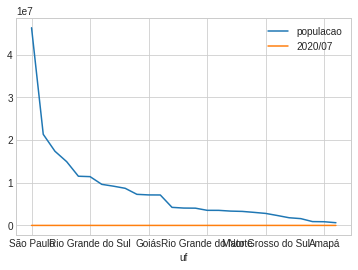

In [ ]:
gastos_e_populacao_mais_recente.plot()

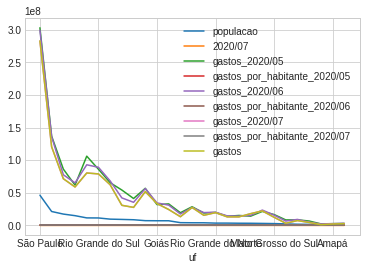

In [ ]:
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/07"] * 1000000
gastos_e_populacao_recente.plot()

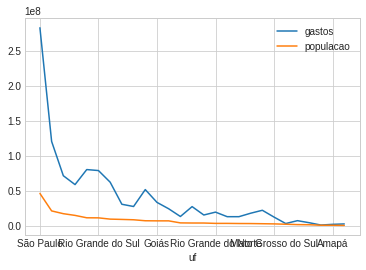

In [ ]:
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/07"] * 1000000
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

In [ ]:
gastos_e_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,populacao,2020/07,gastos_2020/05,gastos_por_habitante_2020/05,gastos_2020/06,gastos_por_habitante_2020/06,gastos_2020/07,gastos_por_habitante_2020/07,gastos
uf,,,,,,,,,
Rio Grande do Sul,11422973,78.93,86076113.42,7.54,89019478.82,7.79,78929703.81,6.91,78929703.81
São Paulo,46289333,282.71,302857660.98,6.54,299060851.62,6.46,282709570.31,6.11,282709570.31


In [ ]:
78929703.81/11422973

6.909733902899009

In [ ]:
282709570.31/46289333	

6.107445322446102

In [ ]:
gastos_e_populacao_recente = gastos_e_populacao_recente.sort_values('gastos_por_habitante_2020/07', ascending=False)
gastos_e_populacao_recente['gastos_por_habitante_2020/07'].plot(backend='plotly', kind='bar')

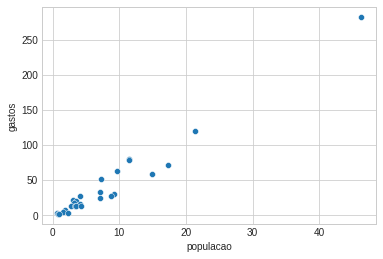

In [ ]:
import seaborn as sns

sns.scatterplot(data = gastos_e_populacao_recente/1000000,x = "populacao",y="gastos")

plotpy

In [ ]:
import plotly.express as px
fig = px.scatter(gastos_e_populacao_recente/1000000, x="populacao", y="gastos",trendline="ols")
fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



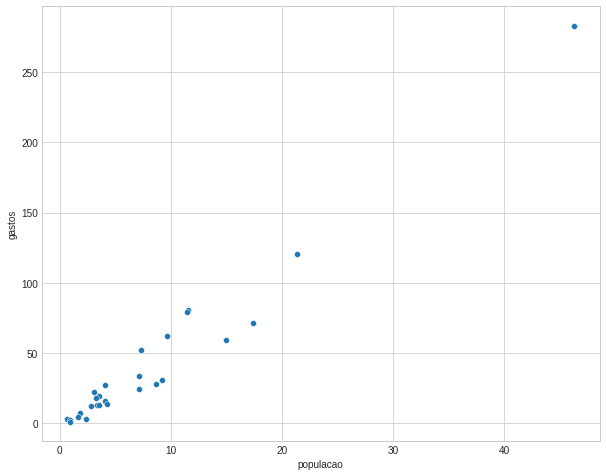

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(data = gastos_e_populacao_recente/1000000,x = "populacao",y="gastos")

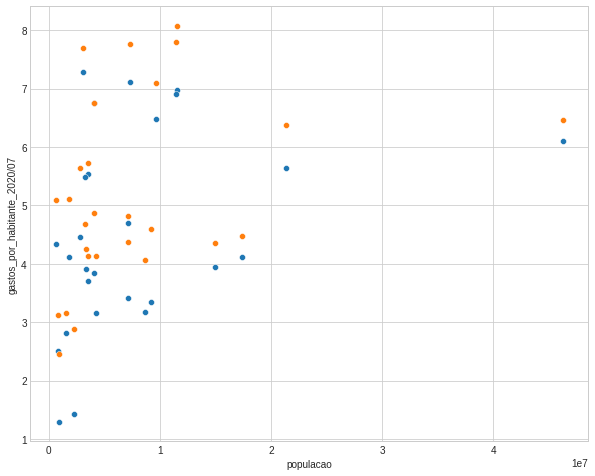

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(data = gastos_e_populacao_recente,x = "populacao",y="gastos_por_habitante_2020/07")
sns.scatterplot(data = gastos_e_populacao_recente,x = "populacao",y="gastos_por_habitante_2020/06")

In [ ]:
insere_gastos_e_gastos_por_habitante_para(ordenado_por_total,gastos_e_populacao_recente, "2020/05")

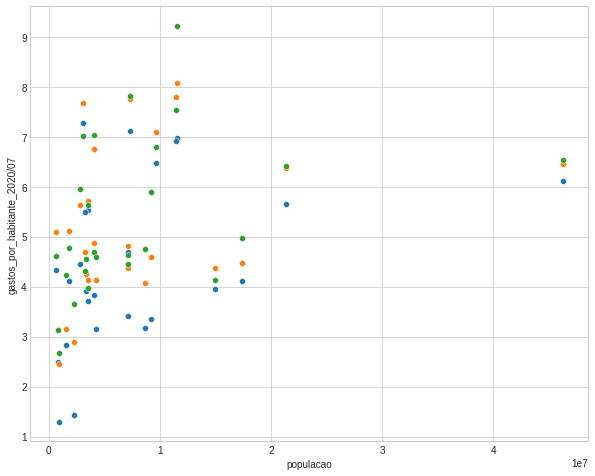

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(data = gastos_e_populacao_recente,x = "populacao",y="gastos_por_habitante_2020/07")
sns.scatterplot(data = gastos_e_populacao_recente,x = "populacao",y="gastos_por_habitante_2020/06")
sns.scatterplot(data = gastos_e_populacao_recente,x = "populacao",y="gastos_por_habitante_2020/05")
plt.show()

## Desafios


1.   Desafio 01: Ordenar por gastos por habitantes e ordenar por população.
2.   Desafio 02: Fazer os mesmos gráficos para o mês anterior a este (junho/2020).
3.   Desafio 03: Plotar no mesmo gráfico o mês atual e o mês anterior com cores diferentes.
4    Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.



### Desafio 1

Desafio 01: Ordenar por gastos por habitantes e ordenar por população.

In [ ]:
gastos_por_habitante = gastos_e_populacao_recente['gastos_por_habitante_2020/07'].sort_values(ascending=False)
fig = gastos_por_habitante.plot(backend='plotly',kind='bar')

fig.update_layout(
    title_text = 'Ordenado por Gastos (R$) por Habitante',
    xaxis_title_text = 'Estados',
    yaxis_title_text = 'Gastos (R$)',
    template = 'plotly_white',
    showlegend=False,
)

fig.show()

In [ ]:
gastos_por_habitante = gastos_e_populacao_recente['populacao'].sort_values(ascending=False)
fig = gastos_por_habitante.plot(backend='plotly',kind='bar')

fig.update_layout(
    title_text = 'Ordenado por Gastos (R$) por Habitante',
    xaxis_title_text = 'Estados',
    yaxis_title_text = 'População',
    template = 'plotly_white',
    showlegend=False,
)

fig.show()

### Desafio 2

Fazer os mesmos gráficos para o mês anterior a este (junho/2020).

In [ ]:
meses = ordenado_por_total.iloc[:,-7:-1]
gastos_e_populacao_2020 =gastos_e_populacao_mais_recente.join(meses)

In [ ]:
gastos_e_populacao_2020["gastos"]=gastos_e_populacao_2020.sum(axis=1)

In [ ]:
def unir_tabelas(df_1,df_2):
    return df_1.join(df_2)

In [ ]:
mes_06 = ordenado_por_total.iloc[:,-2:-1]
mes_06 = unir_tabelas(mes_06,gastos_e_populacao_mais_recente['populacao'])

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("2020/07", "2020/06"))

fig.add_trace(go.Scatter(x = gastos_e_populacao_2020['populacao']/1000000 , 
                         y=gastos_e_populacao_2020['2020/07']/1000000,
                         mode='markers',
                         text=gastos_e_populacao_2020.index
                         ),
              row=1, col=1)

fig.add_trace(go.Scatter(x =mes_06['populacao']/1000000 , 
                         y=mes_06['2020/06']/1000000,
                         mode='markers',
                         text=gastos_e_populacao_2020.index
                         ),
              row=1, col=2)

fig.update_layout(height=500, width=700,
                  title_text="")

fig.show()

### Desafio 3

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=1,
    subplot_titles=("2020/07", "2020/06"))

fig.add_trace(go.Scatter(x = gastos_e_populacao_2020['populacao']/1000000 , 
                         y=gastos_e_populacao_2020['2020/07']/1000000,
                         mode='markers',
                         name="2020/07",
                         text=gastos_e_populacao_2020
                         ),
              row=1, col=1)

fig.add_trace(go.Scatter(x =mes_06['populacao']/1000000 , 
                         y=mes_06['2020/06']/1000000,
                         mode='markers',
                         name="2020/06",
                         text=gastos_e_populacao_2020.index
                         ),
              row=1, col=1)

fig.update_layout(height=500, width=700,
                  title_text="População vs Gasto Total entre os meses de 06 e 07 de 2020")

fig.show()

### Desafio 4

Desafio 04: Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

##Parte 03- Ticks, escalas e formatação de imagem

In [ ]:
ordenado_por_total.head()

,2008/03,2008/04,2008/05,2008/06,2008/07,2008/08,2008/09,2008/10,2008/11,2008/12,2009/01,2009/02,2009/03,2009/04,2009/05,2009/06,2009/07,2009/08,2009/09,2009/10,2009/11,2009/12,2010/01,2010/02,2010/03,2010/04,2010/05,2010/06,2010/07,2010/08,2010/09,2010/10,2010/11,2010/12,2011/01,2011/02,2011/03,2011/04,2011/05,2011/06,...,2017/04,2017/05,2017/06,2017/07,2017/08,2017/09,2017/10,2017/11,2017/12,2018/01,2018/02,2018/03,2018/04,2018/05,2018/06,2018/07,2018/08,2018/09,2018/10,2018/11,2018/12,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,2020/01,2020/02,2020/03,2020/04,2020/05,2020/06,2020/07
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,170.48,170.28,172.40,175.42,179.53,179.90,180.08,191.69,190.54,177.09,192.32,178.60,216.95,215.05,212.89,212.67,214.04,215.21,214.14,216.06,208.97,192.13,213.47,195.78,239.32,221.17,231.78,223.93,224.07,248.01,224.05,238.94,225.48,210.61,229.09,221.60,241.40,229.82,250.79,236.81,...,263.47,292.11,274.30,283.53,300.59,267.30,287.11,267.11,259.45,279.50,254.00,285.27,286.19,291.44,278.93,285.85,295.42,277.58,301.45,278.11,266.24,291.08,267.66,285.58,292.58,308.93,281.41,306.63,302.37,293.69,303.38,282.39,272.70,301.99,271.36,276.61,251.70,302.86,299.06,282.71
Minas Gerais,79.12,79.05,79.27,79.61,82.20,80.37,82.40,88.61,84.49,88.93,99.02,83.68,100.24,91.83,97.29,95.72,100.05,98.97,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.83,105.49,99.67,103.36,107.84,104.34,100.53,101.94,99.54,107.74,103.14,111.07,106.09,115.49,110.06,...,136.72,153.41,144.29,147.53,156.06,142.29,148.31,142.32,138.34,146.50,130.70,151.50,150.69,153.59,150.25,156.63,160.42,145.94,157.25,148.17,145.39,153.18,142.67,151.94,157.92,163.59,154.11,166.74,161.71,157.42,166.13,152.11,152.40,158.10,141.32,147.08,126.33,136.87,135.98,120.47
Paraná,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,74.99,...,106.03,120.54,111.73,118.59,122.12,110.66,117.57,112.46,105.56,116.13,107.08,122.33,124.73,127.07,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.45,132.58,124.86,134.62,127.17,126.17,133.85,126.21,113.55,122.27,116.06,114.48,96.73,106.10,92.90,80.32
Rio Grande do Sul,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,70.77,...,83.19,95.15,93.17,94.42,94.23,86.42,91.60,85.79,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.12,95.84,103.03,98.55,94.37,96.91,90.97,88.72,97.47,85.45,84.65,76.29,86.08,89.02,78.93
Rio de Janeiro,42.89,45.30,43.95,44.10,44.35,42.49,43.07,44.55,41.35,43.01,60.87,40.66,52.75,48.90,51.17,57.23,53.49,51.22,48.48,48.67,49.69,44.41,55.99,44.82,54.46,78.12,56.01,51.44,53.86,57.87,53.74,52.37,50.22,50.89,74.01,61.11,55.32,55.81,59.07,55.21,...,64.52,74.32,69.85,73.15,74.54,68.73,73.08,69.26,67.32,72.34,65.02,74.39,74.52,79.26,75.91,77.49,78.78,72.84,79.14,73.95,70.69,79.47,73.80,74.92,76.67,82.44,78.19,87.98,83.31,81.15,82.25,74.62,74.90,79.71,72.41,73.59,68.16,86.28,77.60,71.54


In [ ]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/03,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008/04,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008/05,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008/06,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
2008/07,179.53,82.20,59.80,56.39,44.35,57.66,30.99,30.05,30.30,20.01,22.54,14.54,12.21,11.12,13.09,11.30,10.17,10.62,9.39,9.79,8.76,4.93,5.06,2.97,2.03,1.00,1.37


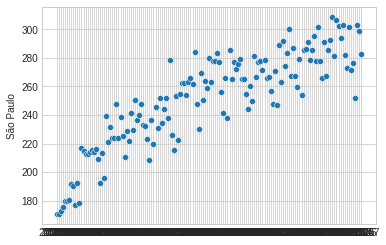

In [ ]:
sns.scatterplot(data=mensal, x=mensal.index, y="São Paulo")

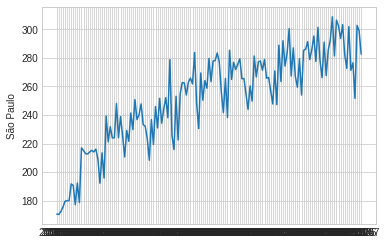

In [ ]:
sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")

In [ ]:
import matplotlib.ticker as ticker

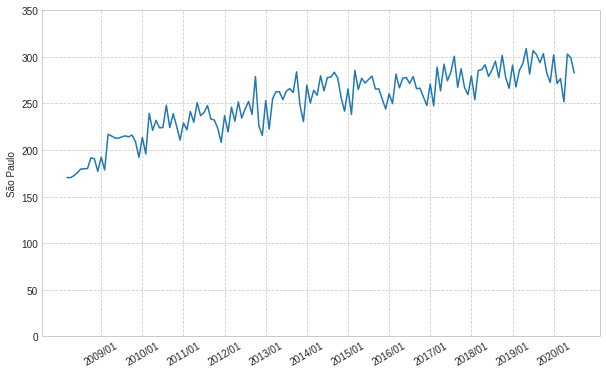

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=10))
plt.grid(linestyle="--")
plt.show()

In [ ]:
fig = px.line(x=mensal.index, y=mensal['São Paulo'])

fig.update_xaxes(tickangle = -45,
                 showgrid=True,
                 tick0=10, 
                 dtick=11
                 )
# Edit the layout
fig.update_layout(title='Gastos por mês do Estado de Sao Paulo',
                   xaxis_title='Mês e Ano',
                   yaxis_title='Gasto(R$)')
fig.show()

##Desafios

###Desafio 01: 

Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.



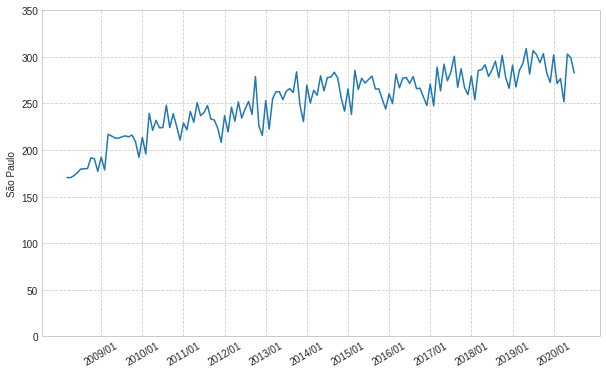

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=10))
plt.grid(linestyle="--")
plt.show()

###Desafio 02: 
Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

Text(0, 0.5, 'Gastos em milhões de reais (R$)')

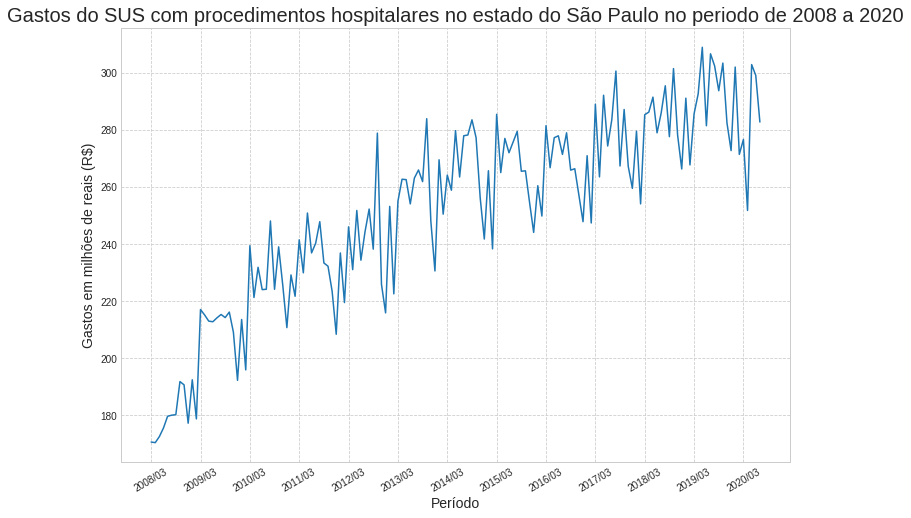

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(linestyle='--')
plt.title('Gastos do SUS com procedimentos hospitalares no estado do São Paulo no periodo de 2008 a 2020', fontsize=20)
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Gastos em milhões de reais (R$)', fontsize=14)

##Parte-04 - Trabalhando com DateTime e Melt

Datas com Datetime

In [ ]:
from datetime import date

In [ ]:
date.today()

datetime.date(2020, 11, 25)

In [ ]:
meses = {
    "01": 1,"02":2,
    "03": 3,"04":4,
    "05": 5,"06":6,
    "07": 7,"08":8,
    "09": 9,"10":10,
    "11": 11,"12":12,
}

def para_dia(ano_mes:str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero : int = meses[mes]
  return date(ano, mes_numero,1)

In [ ]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-03-01,170.48,79.12,55.61,52.93,42.89,41.30,30.72,27.48,30.09,20.99,22.15,14.75,12.26,10.13,12.35,11.63,9.79,10.43,9.21,9.42,8.64,5.02,5.20,1.96,2.06,0.88,1.18
2008-04-01,170.28,79.05,56.12,51.97,45.30,42.83,30.59,27.81,31.38,21.05,23.44,15.15,12.45,10.96,12.68,11.92,9.00,10.23,10.47,9.39,8.53,5.27,5.34,2.14,2.06,0.90,1.40
2008-05-01,172.40,79.27,55.57,51.68,43.95,42.07,31.41,28.35,31.19,19.16,23.86,14.54,11.79,11.03,13.26,11.90,9.84,10.56,9.84,9.38,9.08,5.37,5.34,2.28,2.23,1.03,1.41
2008-06-01,175.42,79.61,56.09,53.76,44.10,39.91,28.95,28.99,29.46,20.33,23.50,14.55,11.89,10.45,12.25,11.97,10.26,10.47,10.29,9.45,8.65,4.98,5.40,2.62,2.11,0.94,1.42
2008-07-01,179.53,82.20,59.80,56.39,44.35,57.66,30.99,30.05,30.30,20.01,22.54,14.54,12.21,11.12,13.09,11.30,10.17,10.62,9.39,9.79,8.76,4.93,5.06,2.97,2.03,1.00,1.37


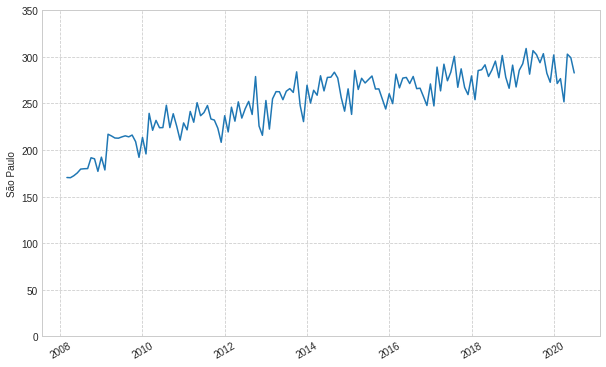

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
plt.ylim(0, 350)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle="--")
plt.show()

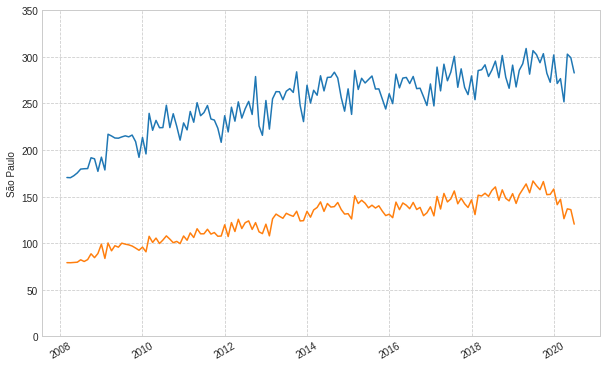

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
plt.ylim(0, 350)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle="--")
plt.show()

Problemas:

1- Eixo

2- legenda

3- Sério mesmo? copye  paste das linhas do grafico?

In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars = ["index"], value_vars = mensal.columns)
mensal_aberto.columns = ["mes","uf","gasto"]
mensal_aberto.head()

,mes,uf,gasto
0,2008-03-01,São Paulo,170.48
1,2008-04-01,São Paulo,170.28
2,2008-05-01,São Paulo,172.40
3,2008-06-01,São Paulo,175.42
4,2008-07-01,São Paulo,179.53


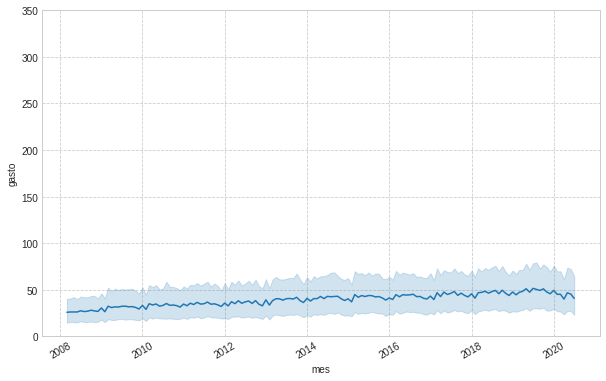

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto")
plt.xticks(rotation=30)
plt.ylim(0, 350)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle="--")
plt.show()

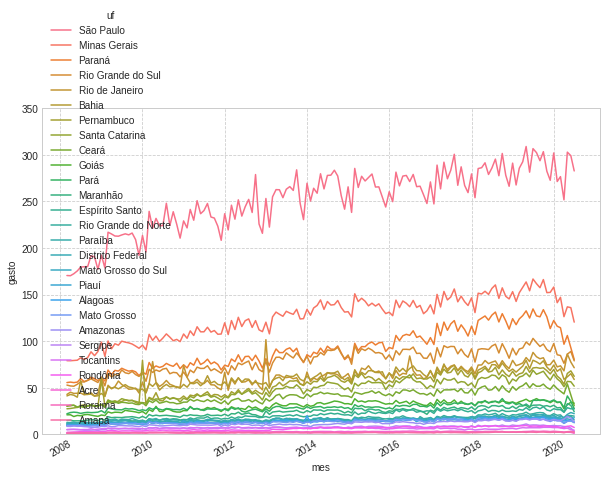

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue = "uf")
plt.xticks(rotation=30)
plt.ylim(0, 350)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
plt.grid(linestyle="--")
plt.show()

Problemas

-Muitos estados, escolha os estados

-Palete de cores

-Posição da legenda

-Titulo e titulo dos eixos

###Desafios

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.
***

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.


PIVOT

Documentação: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

In [ ]:
mensal_aberto.head(12)

,mes,uf,gasto
0,2008-03-01,São Paulo,170.48
1,2008-04-01,São Paulo,170.28
2,2008-05-01,São Paulo,172.40
3,2008-06-01,São Paulo,175.42
4,2008-07-01,São Paulo,179.53
5,2008-08-01,São Paulo,179.90
6,2008-09-01,São Paulo,180.08
7,2008-10-01,São Paulo,191.69
8,2008-11-01,São Paulo,190.54
9,2008-12-01,São Paulo,177.09


In [ ]:
mensal_rec_teste = mensal_aberto.pivot(index='mes',columns='uf',values='gasto')
mensal_rec_teste.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40
2008-07-01,2.03,9.39,1.37,8.76,57.66,30.30,11.30,12.21,20.01,14.54,9.79,10.17,82.20,59.80,13.09,22.54,30.99,10.62,11.12,56.39,44.35,2.97,1.00,30.05,4.93,179.53,5.06


In [ ]:
mensal_rec = mensal_aberto.pivot_table(index='mes',columns='uf',values='gasto')
mensal_rec.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
mes,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-03-01,2.06,9.21,1.18,8.64,41.30,30.09,11.63,12.26,20.99,14.75,9.42,9.79,79.12,55.61,12.35,22.15,30.72,10.43,10.13,52.93,42.89,1.96,0.88,27.48,5.02,170.48,5.20
2008-04-01,2.06,10.47,1.40,8.53,42.83,31.38,11.92,12.45,21.05,15.15,9.39,9.00,79.05,56.12,12.68,23.44,30.59,10.23,10.96,51.97,45.30,2.14,0.90,27.81,5.27,170.28,5.34
2008-05-01,2.23,9.84,1.41,9.08,42.07,31.19,11.90,11.79,19.16,14.54,9.38,9.84,79.27,55.57,13.26,23.86,31.41,10.56,11.03,51.68,43.95,2.28,1.03,28.35,5.37,172.40,5.34
2008-06-01,2.11,10.29,1.42,8.65,39.91,29.46,11.97,11.89,20.33,14.55,9.45,10.26,79.61,56.09,12.25,23.50,28.95,10.47,10.45,53.76,44.10,2.62,0.94,28.99,4.98,175.42,5.40
2008-07-01,2.03,9.39,1.37,8.76,57.66,30.30,11.30,12.21,20.01,14.54,9.79,10.17,82.20,59.80,13.09,22.54,30.99,10.62,11.12,56.39,44.35,2.97,1.00,30.05,4.93,179.53,5.06


<img src='https://raw.githubusercontent.com/avellar1975/DataScience/main/img/icones_readme.png'>

ideia do Notebook do Avellar

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados. Mude a palete de cores. Posicione a legenda de forma mais adequada. Adicione título principal e nos eixos x e y.

Criar uma sessão de função para vários estilos de gráficos

In [ ]:
def selecionando_dados_plotagem(dados,estados_selecionados, titulo,legenda,labelX,labelY,paleta):
  dados_usados = dados[dados['uf'].isin(estados_selecionados)]
  plt.figure(figsize=(16,7))
  ax = sns.lineplot(data = dados_usados,
                    x = labelX,
                    y = 'gasto',
                    hue = 'uf'
                     )
  sns.set_palette(paleta)
  plt.ylabel(labelY,fontdict = {'fontsize' : 20})
  plt.xlabel(labelX,fontdict = {'fontsize' : 20})
  plt.legend(title=legenda,bbox_to_anchor=(1.04,1), loc='upper left' )
  plt.ylim(0,350)
  plt.title(titulo,color='blue',size=18)
  plt.show()

In [ ]:
sudeste= ['São Paulo','Rio de Janeiro','Minas Gerais','Espírito Santo']

In [ ]:
mensal_aberto

,mes,uf,gasto
0,2008-03-01,São Paulo,170.48
1,2008-04-01,São Paulo,170.28
2,2008-05-01,São Paulo,172.40
3,2008-06-01,São Paulo,175.42
4,2008-07-01,São Paulo,179.53
...,...,...,...
4018,2020-03-01,Amapá,2.29
4019,2020-04-01,Amapá,1.77
4020,2020-05-01,Amapá,2.70
4021,2020-06-01,Amapá,2.70


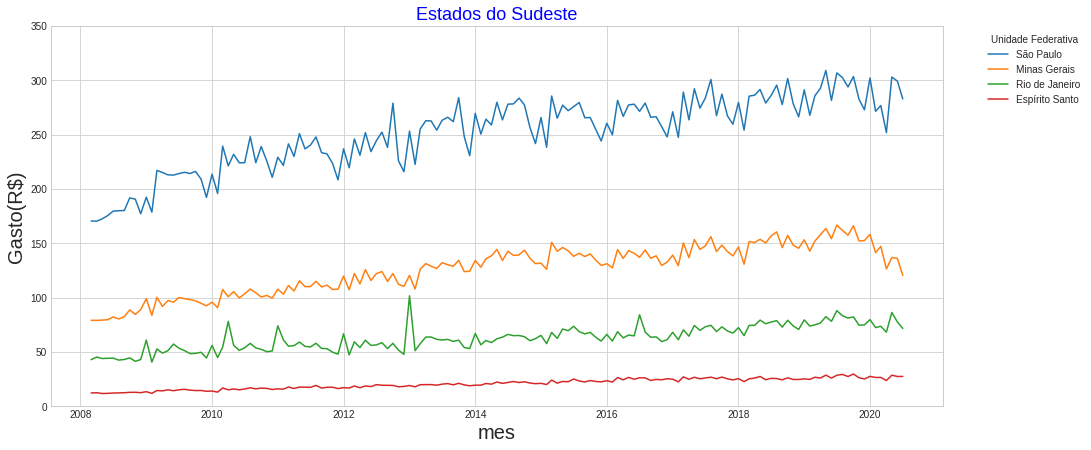

In [ ]:
selecionando_dados_plotagem(mensal_aberto,sudeste,"Estados do Sudeste","Unidade Federativa",'mes',"Gasto(R$)","rocket_r")

##Parte 05- Manipulando datas e gerando novas análises

In [ ]:
mensal_aberto.columns = ['dia_mes_ano','uf','gasto']
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-03-01,São Paulo,170.48
1,2008-04-01,São Paulo,170.28
2,2008-05-01,São Paulo,172.40
3,2008-06-01,São Paulo,175.42
4,2008-07-01,São Paulo,179.53


In [ ]:
mensal_aberto['dia_mes_ano'].head()

0   2008-03-01
1   2008-04-01
2   2008-05-01
3   2008-06-01
4   2008-07-01
Name: dia_mes_ano, dtype: datetime64[ns]

In [ ]:
mensal_aberto['mes'] = mensal_aberto['dia_mes_ano'].dt.month
mensal_aberto['ano'] = mensal_aberto['dia_mes_ano'].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-03-01,São Paulo,170.48,3,2008
1,2008-04-01,São Paulo,170.28,4,2008
2,2008-05-01,São Paulo,172.40,5,2008
3,2008-06-01,São Paulo,175.42,6,2008
4,2008-07-01,São Paulo,179.53,7,2008


In [ ]:
mensal_aberto.query("uf == 'São Paulo'")

,dia_mes_ano,uf,gasto,mes,ano
0,2008-03-01,São Paulo,170.48,3,2008
1,2008-04-01,São Paulo,170.28,4,2008
2,2008-05-01,São Paulo,172.40,5,2008
3,2008-06-01,São Paulo,175.42,6,2008
4,2008-07-01,São Paulo,179.53,7,2008
...,...,...,...,...,...
144,2020-03-01,São Paulo,276.61,3,2020
145,2020-04-01,São Paulo,251.70,4,2020
146,2020-05-01,São Paulo,302.86,5,2020
147,2020-06-01,São Paulo,299.06,6,2020


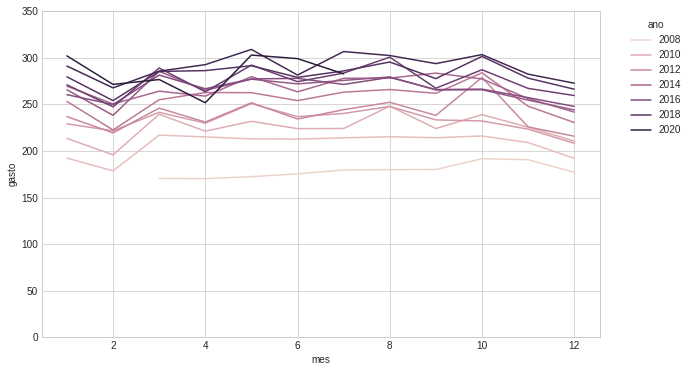

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto", hue = "ano")
plt.xticks(rotation=0)
plt.ylim(100, 350)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
sns.set_palette("rocket_r")
plt.legend(title="ano",bbox_to_anchor=(1.04,1), loc='upper left' )
plt.ylim(0,350)
plt.show()

In [ ]:
fig = px.bar(mensal_aberto.query("uf == 'São Paulo'"), x=["Jan", "FEV"], y=[10,20], color=["Here", "There"],
    labels=dict(x="mes", y="gasto",  color = "ano")
)
fig.show()

In [ ]:
fig = px.line(mensal_aberto.query("uf == 'São Paulo'"),x="mes", y="gasto",  color = "ano")

fig.update_xaxes(tickangle = -45,
                 showgrid= True
                 )
# Edit the layout
fig.update_layout(title='Gastos por mês do Estado de Sao Paulo',
                   xaxis_title='Mês e Ano',
                   yaxis_title='Gasto(R$)',
                  )
fig.show()

In [ ]:
dias_por_mes = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

In [ ]:
mensal_aberto['gasto_diario']=mensal_aberto['gasto']/mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-03-01,São Paulo,170.48,3,2008,5.50
1,2008-04-01,São Paulo,170.28,4,2008,5.68
2,2008-05-01,São Paulo,172.40,5,2008,5.56
3,2008-06-01,São Paulo,175.42,6,2008,5.85
4,2008-07-01,São Paulo,179.53,7,2008,5.79


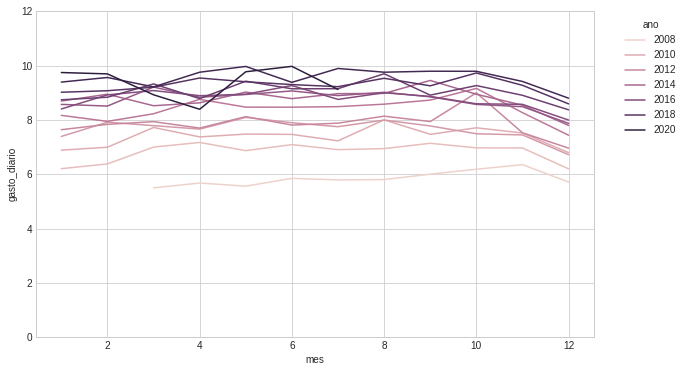

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x="mes", y="gasto_diario", hue = "ano")
plt.xticks(rotation=0)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
sns.set_palette("rocket_r")
plt.legend(title="ano",bbox_to_anchor=(1.04,1), loc='upper left' )
plt.ylim(0,12)
plt.show()

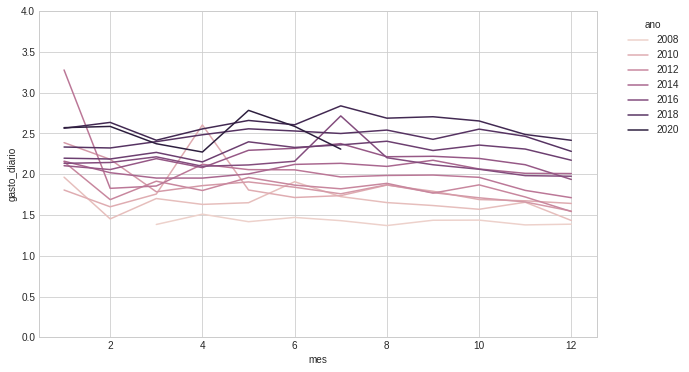

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'Rio de Janeiro'"), x="mes", y="gasto_diario", hue = "ano")
plt.xticks(rotation=0)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
sns.set_palette("rocket_r")
plt.legend(title="ano",bbox_to_anchor=(1.04,1), loc='upper left' )
plt.ylim(0,4)
plt.show()

##desafios

Desafio 01: Melhorar o gráfico ano a ano: - Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

**Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

Adicionando o Nome do Mês

In [ ]:
nome_do_mes = {
    1: 'Jan',
    2: 'Fev',
    3: 'Mar',
    4: 'Abr',
    5: 'Mai',
    6: 'Jun',
    7: 'Jul',
    8: 'Ago',
    9: 'Set',
    10: 'Out',
    11: 'Nov',
    12: 'Dez'
}

mensal_aberto['nome_mes'] =  mensal_aberto['mes'].map(nome_do_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario,nome_mes
0,2008-03-01,São Paulo,170.48,3,2008,5.50,Mar
1,2008-04-01,São Paulo,170.28,4,2008,5.68,Abr
2,2008-05-01,São Paulo,172.40,5,2008,5.56,Mai
3,2008-06-01,São Paulo,175.42,6,2008,5.85,Jun
4,2008-07-01,São Paulo,179.53,7,2008,5.79,Jul


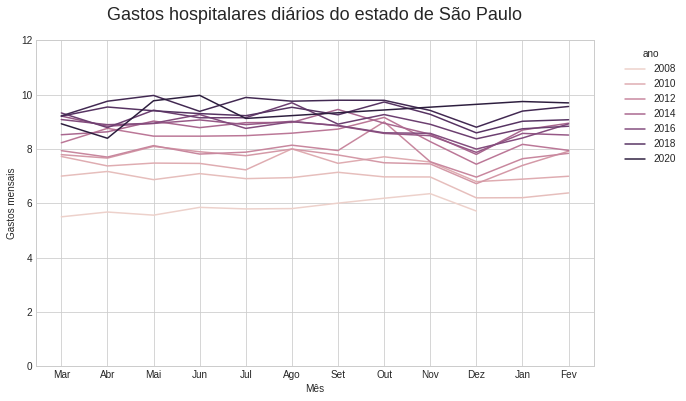

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf == 'São Paulo'"), x="nome_mes", y="gasto_diario", hue = "ano")
plt.xticks(rotation=0)
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))


plt.title('Gastos hospitalares diários do estado de São Paulo', fontsize=18, pad=20)
plt.ylabel('Gastos mensais')
plt.xlabel('Mês')

sns.set_palette("rocket_r")
plt.legend(title="ano",bbox_to_anchor=(1.04,1), loc='upper left' )
plt.ylim(0,12)
plt.show()

Adicionado uma busca para 3 estados de regiões diferentes

In [ ]:
estados =['São Paulo','Pará','Distrito Federal']
busca = f'uf  == {estados}'
mensal_REGIAO = mensal_aberto.query(busca)
mensal_REGIAO.sample(5)

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario,nome_mes
1624,2019-05-01,Pará,31.06,5,2019,1.00,Mai
1604,2017-09-01,Pará,32.98,9,2017,1.10,Set
1554,2013-07-01,Pará,27.83,7,2013,0.90,Jul
2308,2014-04-01,Distrito Federal,17.18,4,2014,0.57,Abr
2275,2011-07-01,Distrito Federal,14.15,7,2011,0.46,Jul


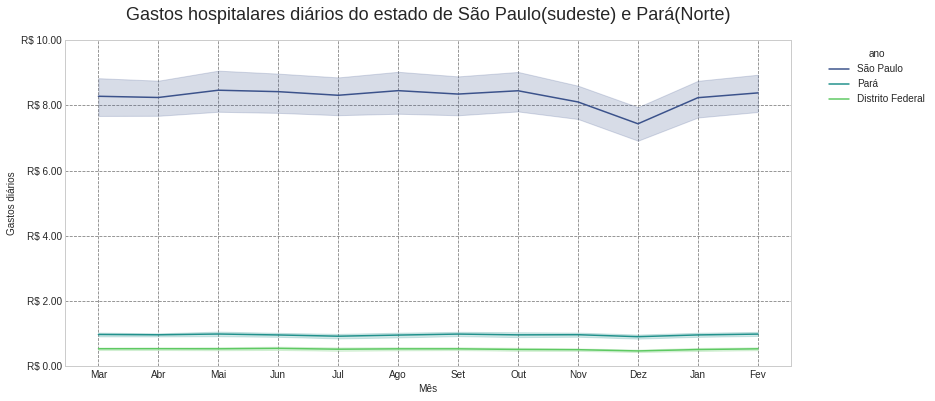

In [ ]:
plt.figure(figsize=(13,6))
plt.grid(linestyle='--', color='grey')

ax5 = sns.lineplot(data=mensal_REGIAO, 
                   x='nome_mes', y='gasto_diario', hue='uf', palette='viridis' )
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax5.legend(bbox_to_anchor=(1, 0, 0.5 , 1))
ax5.xaxis.set_major_locator(ticker.IndexLocator(base=1, offset=0))

plt.title('Gastos hospitalares diários do estado de São Paulo(sudeste) e Pará(Norte)', fontsize=18, pad=20)
plt.ylabel('Gastos diários')
plt.xlabel('Mês')

sns.set_palette("rocket_r")
plt.legend(title="ano",bbox_to_anchor=(1.04,1), loc='upper left' )
plt.ylim(0,10)
plt.show()

##Parte 06- Agrupando dados e analisando por categoria

In [ ]:
estado_a_analisar = mensal_aberto.query("uf == 'São Paulo'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario,nome_mes
0,2008-03-01,São Paulo,170.48,3,2008,5.50,Mar
1,2008-04-01,São Paulo,170.28,4,2008,5.68,Abr
2,2008-05-01,São Paulo,172.40,5,2008,5.56,Mai
3,2008-06-01,São Paulo,175.42,6,2008,5.85,Jun
4,2008-07-01,São Paulo,179.53,7,2008,5.79,Jul


In [ ]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,1787.40,75,58.43
2009,2489.03,78,81.82
2010,2696.62,78,88.63
2011,2794.55,78,91.91
2012,2873.97,78,94.47


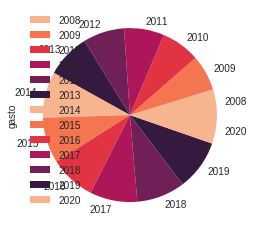

In [ ]:
gastos_por_ano.plot(kind = 'pie',y='gasto')

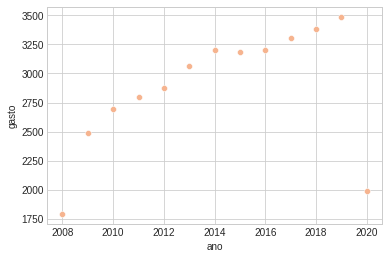

In [ ]:
sns.scatterplot(data = gastos_por_ano, x= gastos_por_ano.index , y = "gasto")

#limite e Y 

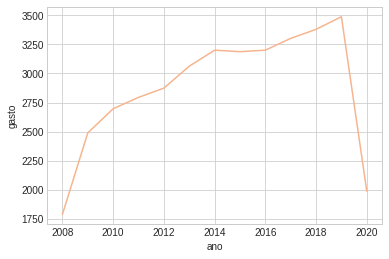

In [ ]:
sns.lineplot(data = gastos_por_ano, x= gastos_por_ano.index , y = "gasto")

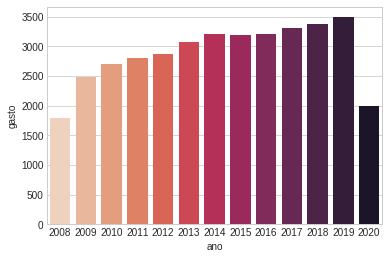

In [ ]:
sns.barplot(data = gastos_por_ano, x= gastos_por_ano.index , y = "gasto", palette =sns.color_palette("rocket_r",13))

In [ ]:
estados =['São Paulo','Pará','Distrito Federal','Pernambuco','Minas gerais']
busca = f'uf  == @estados'
mensal_REGIAO = mensal_aberto.query(busca).groupby(['uf','ano']).sum().reset_index()
mensal_REGIAO

,uf,ano,gasto,mes,gasto_diario
0,Distrito Federal,2008,119.42,75,3.90
1,Distrito Federal,2009,166.03,78,5.46
2,Distrito Federal,2010,168.07,78,5.53
3,Distrito Federal,2011,176.75,78,5.81
4,Distrito Federal,2012,179.45,78,5.90
5,Distrito Federal,2013,189.43,78,6.23
6,Distrito Federal,2014,184.00,78,6.05
7,Distrito Federal,2015,176.14,78,5.79
8,Distrito Federal,2016,199.82,78,6.57
9,Distrito Federal,2017,209.10,78,6.87


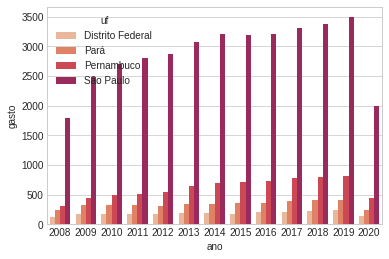

In [ ]:
sns.barplot(data = mensal_REGIAO, x= "ano" , y = "gasto", hue = "uf")

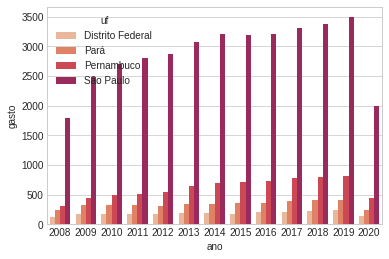

In [ ]:
sns.barplot(x='ano', y='gasto', data=mensal_REGIAO, hue='uf')

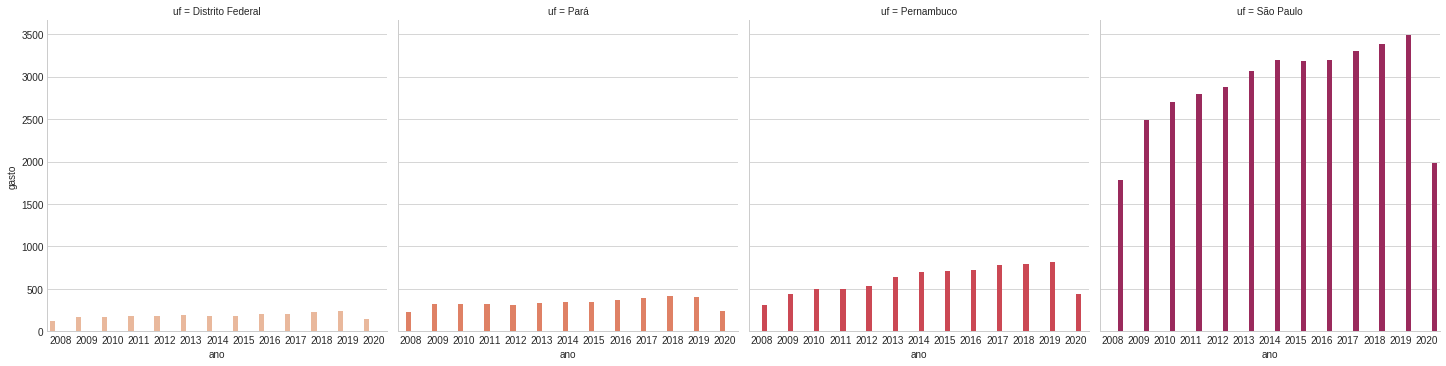

In [ ]:
sns.catplot( data=mensal_REGIAO,x='ano', y='gasto', hue='uf', kind= "bar", col ='uf' )

##Desafios

Desafio 01: Reordenar as cores pelo valor do eixo y.

Desafio 02: Explorar a documentação do Seaborn.

Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.

In [ ]:
anos_len = gastos_por_ano.reset_index().sort_values('gasto',ascending=True)['ano']  #tamanho 13
anos_len

0     2008
12    2020
1     2009
2     2010
3     2011
4     2012
5     2013
7     2015
6     2014
8     2016
9     2017
10    2018
11    2019
Name: ano, dtype: int64

In [ ]:
cores_len = sns.color_palette("flare",len(gastos_por_ano['gasto'])) #tamanho 13

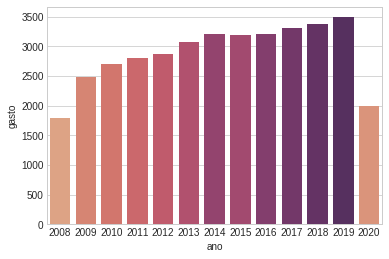

In [ ]:
palette_sorted = dict(zip(anos_len,cores_len))
sns.barplot(data =  gastos_por_ano, x = gastos_por_ano.index, y='gasto',palette=palette_sorted)

###DESAFIO AULA 6 - 02 e 03 <br>
>Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

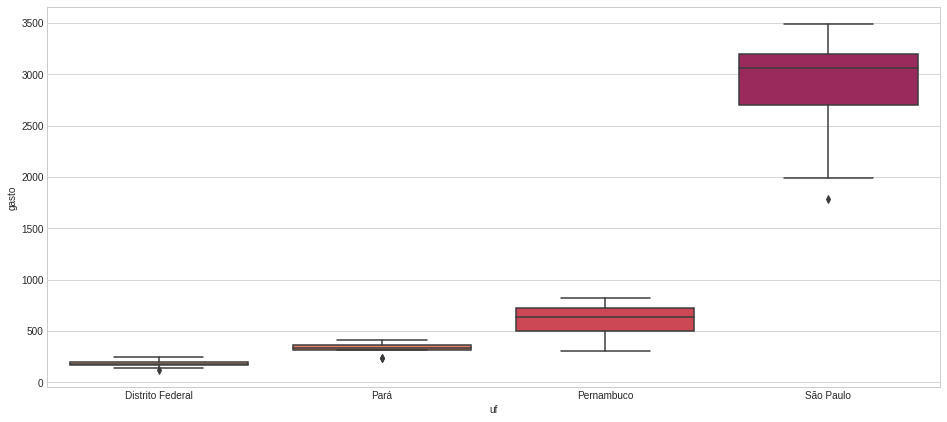

In [ ]:
plt.figure(figsize=(16,7))
sns.boxplot(data =mensal_REGIAO, x = 'uf', y='gasto')